In [1]:
from qiskit.utils import algorithm_globals
import numpy as np
import matplotlib.pyplot as plt
from qiskit_machine_learning.datasets import ad_hoc_data

seed = 2022
algorithm_globals.random_seed = seed

In [2]:
adhoc_dimension = 2
xtrain, ytrain, xtest, ytest, adhoc_total = ad_hoc_data(
    training_size=50,
    test_size=10,
    n=adhoc_dimension,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True
)

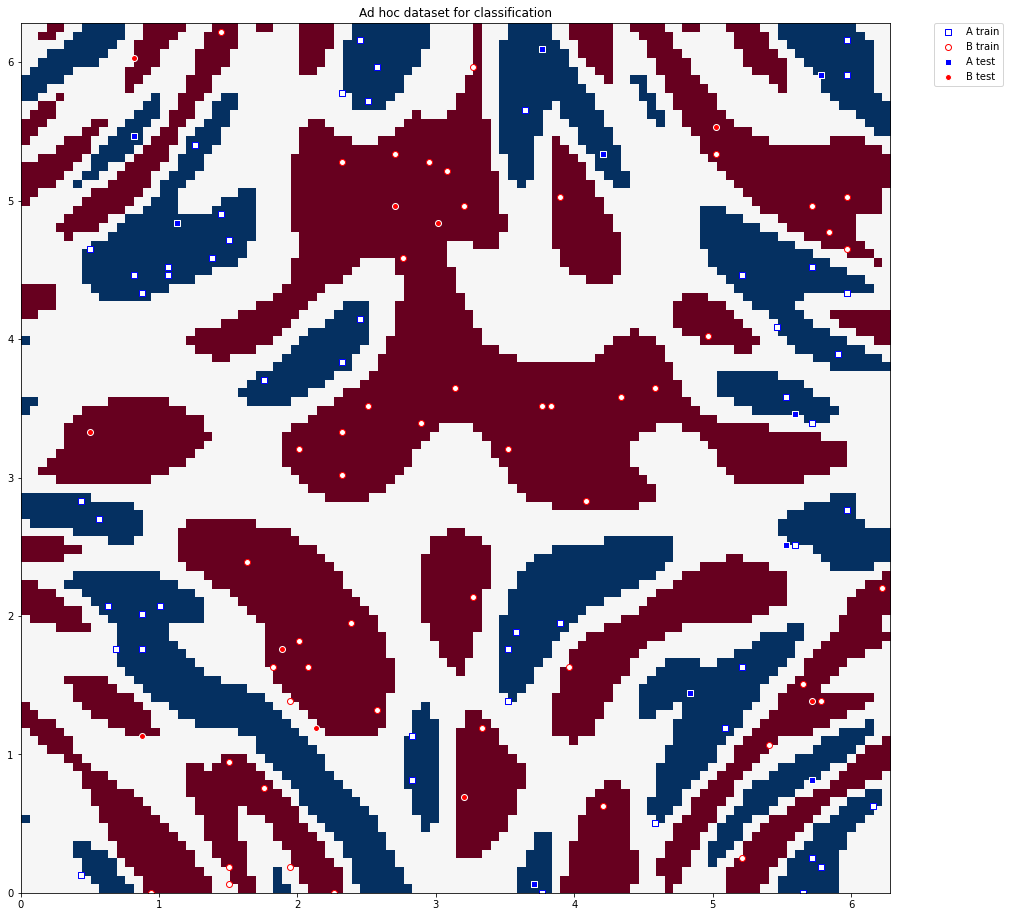

In [3]:
plt.figure(figsize=(16,16))
plt.ylim(0, 2 * np.pi)
plt.xlim(0, 2 * np.pi)

plt.imshow(np.asmatrix(adhoc_total).T, interpolation='nearest',
          origin='lower', cmap='RdBu', extent=[0, 2 * np.pi, 0, 2 *np.pi])

plt.scatter(xtrain[np.where(ytrain[:] == 0),0], xtrain[np.where(ytrain[:] == 0), 1],
           marker='s', facecolors='w', edgecolors='b', label = "A train")
plt.scatter(xtrain[np.where(ytrain[:] == 1),0], xtrain[np.where(ytrain[:] == 1), 1],
           marker='o', facecolors='w', edgecolors='r', label = "B train")
plt.scatter(xtest[np.where(ytest[:] == 0),0], xtest[np.where(ytest[:] == 0), 1],
           marker='s', facecolors='b', edgecolors='w', label = "A test")
plt.scatter(xtest[np.where(ytest[:] == 1),0], xtest[np.where(ytest[:] == 1), 1],
           marker='o', facecolors='r', edgecolors='w', label = "B test")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Ad hoc dataset for classification")

plt.show()

In [4]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(xtrain, ytrain)
svc.score(xtest, ytest)

0.7

In [5]:
def mykernel(x, y):
    M = np.array([[2,0],[0,1.0]])
    return np.dot(np.dot(x,M), y.T)

svc=SVC(kernel=mykernel)
svc.fit(xtrain,ytrain)
svc.score(xtest,ytest)

0.5

In [6]:
from qiskit import Aer
from qiskit.utils import QuantumInstance

quantum_instance = QuantumInstance(
    Aer.get_backend('qasm_simulator'),
    shots=1024,
    seed_simulator=seed,
    seed_transpiler=seed
)

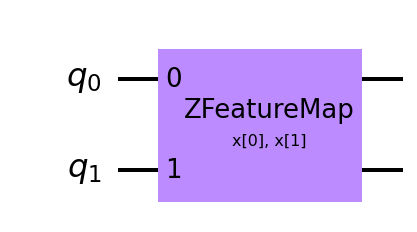

In [7]:
from qiskit.circuit.library import ZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel

z_feature_map = ZFeatureMap(feature_dimension=adhoc_dimension, reps=2)

z_kernel = QuantumKernel(feature_map=z_feature_map, quantum_instance= quantum_instance)

z_feature_map.draw(output='mpl', scale=2)

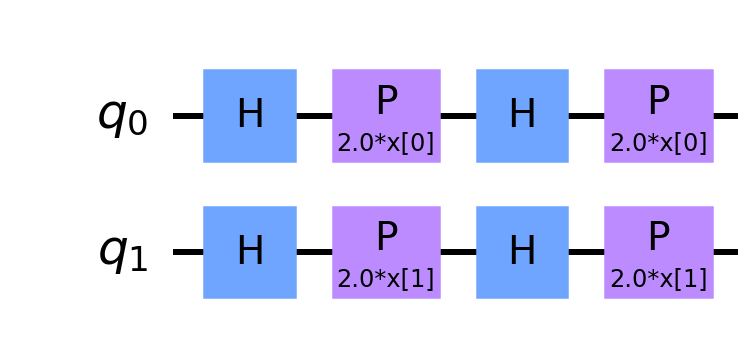

In [8]:
z_feature_map.decompose().draw(output='mpl', scale=3)

In [9]:
svc = SVC(kernel=z_kernel.evaluate)
svc.fit(xtrain, ytrain)
svc.score(xtest, ytest)

0.7

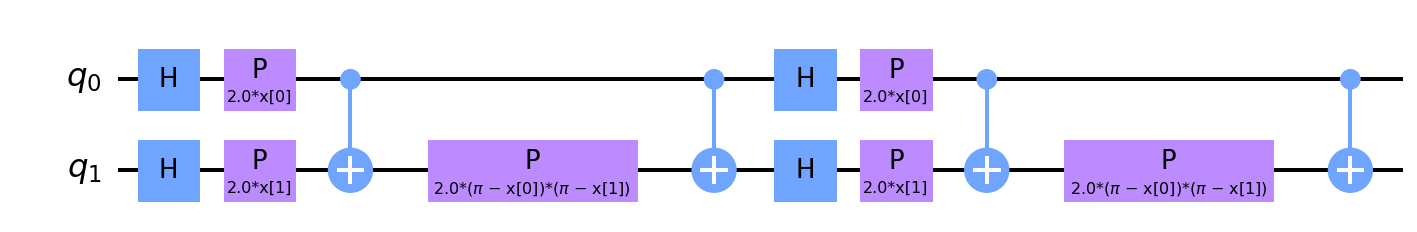

In [10]:
from qiskit.circuit.library import ZZFeatureMap

zz_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement='linear')
zz_kernel = QuantumKernel(feature_map=zz_feature_map, quantum_instance=quantum_instance)

zz_feature_map.decompose().draw(output='mpl', scale=2)

In [11]:
svc = SVC(kernel=zz_kernel.evaluate)
svc.fit(xtrain, ytrain)
svc.score(xtest, ytest)

1.0

In [ ]:
# from qiskit_machine_learning.algorithms import QSVC

# qsvc = QSVC()
# qsvc.quantum_kernel.quantum_instance = quantum_instance

# qsvc.fit(xtrain, ytrain)
# qsvc.score(xtest, ytest)

In [ ]:
# qsvc.predict(xtest)